# Sentiment Analysis on Mainstream Video Game Twits

- Keeley: put their contribution here
- Goar: put their contribution here
- Isaac: put their contribution here
- Jim: put their contribution here
- Vik: put their contribution here 


# Introduction

### This project is about analyzing Twitter tweets' sentiments about a selection of video games. The video games to be analyzed are: 
##### Borderlands, Call of Duty Black Ops Cold War, Overwatch, NBA2k, Dota 2, World of War Craft, CS-GO, Assasin's Creed, Apex Legends, League of Legends, Fortnite, Battlefield, Heartstone, PUB G, FIFA, RDR, Rainbow Six, GTA, Madden NFL, Cyberpunk 2077, Ghost Recon, and Hearthstone. 
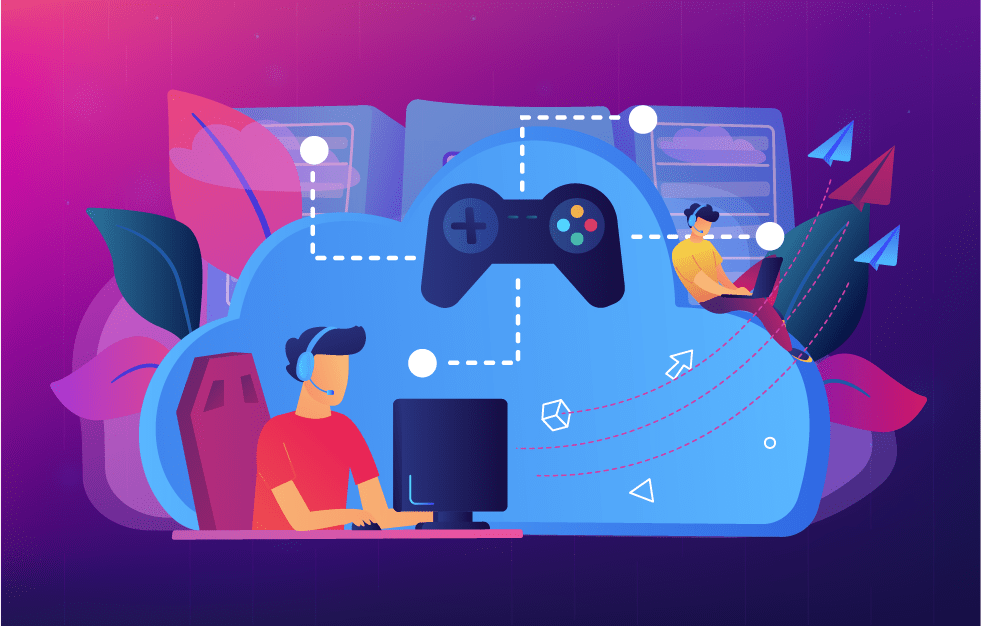

# Research Question
##### Which video game will have the most positive and negative sentiment analysis on Twitter using built in sentiment?
##### Which video game will have the most postivie and negative sentiment analysis using text blob sentiment?
##### Will the game that has the most positive sentiment( from vader ) also have the tweet with the most positive sentiment score?



# Dataset Description

### Description 
This data set was orginally taken from the website Kaggle. It contains a list of twitter user ids, the names of a variety of video games, an already predetermined sentiment, and finally the tweets from the corresponding twitter users. These tweets contain the users opinions and thoughts on specific video games. With these opinions ranging from good thoughts, bad thoughts, and neutral thoughts. 

In [1]:
# Install necessary libraries
!pip install nltk
!pip install -U textblob

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached regex-2023.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (770 kB)
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [2]:
# import necessary functions required for a reproducibile sentiment analysis using social media data
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

#### df.describe - rename columns,

In [3]:
# convert the csv with comments to Pandas Datafram (vg stands for video game) 
vg = pd.read_csv('twitter_training.csv')

In [4]:
# display the ordered data from the top
vg.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
# rename columns to clear categories
vg.rename(columns={'2401': 'Sentiment_Batch', 'Borderlands': 'Video_Game', 'Positive': 'Sentiment', 'im getting on borderlands and i will murder you all ,': 'Tweet'}, inplace=True)

In [6]:
# display renamed ordered data from the top
vg.head()

,Sentiment_Batch,Video_Game,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
# generate descriptive statistics, display data distribution summary
vg.describe()

,Sentiment_Batch
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


# Preprocessing

In [8]:
# Drop Missing Data
vg.dropna(inplace=True)

# Drop Duplicates
vg.drop_duplicates()


,Sentiment_Batch,Video_Game,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [9]:
# delete irrelevant subjects
values_to_delete = ['Nvidia', 'johnson&johnson','Facebook', 'HomeDepot', 'Verizon', 'Microsoft', 'Google', 'PlayStation5(PS5)', 'Xbox(Xseries)', 'Amazon']
filtered_vg = vg[~vg['Video_Game'].isin(values_to_delete)]

In [33]:
values_to_delete1 = ['Irrelevant']
filtered_vg2= filtered_vg[~filtered_vg['Sentiment'].isin(values_to_delete1)]

In [34]:
# text cleaning - remove mentions, signs, spaces, and unknown values
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+|www\S+|https\S+|pic\S+', '', text, flags=re.MULTILINE)  # remove URLs
        text = re.sub(r'@\w+', '', text)  # remove mentions
        text = re.sub(r'\s*@+\s*', ' ', text) # remove mentions with extra spaces
        text = re.sub(r'#\w+', '', text)  # remove hashtags
        text = re.sub(r'\s+', ' ', text)  # remove extra spaces
        text = re.sub(r'-', '', text) #remove hyphens
        text = re.sub(r'[><]', '', text) #remove greater/less than signs
        text = re.sub(r'[\\/]', '', text) #remove /\ signs
        text = re.sub(r'\.', '', text) # remove "."
        text = re.sub(r'\,', '', text) #remove ","
        text = re.sub(r'unk', '', text) # remove "unk"        
        return text.strip()
    else:
        return text
    

filtered_vg2['Clean_Text'] = filtered_vg2['Tweet'].apply(clean_text)

/tmp/ipykernel_119/2207864593.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_vg2['Clean_Text'] = filtered_vg2['Tweet'].apply(clean_text)


# Analysis

In [35]:
# Define a function for sentiment analysis using NLTK's Vader
def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return "Positive"
    elif sentiment['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"
    
def get_sent_vader_cont(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']


In [36]:
# create new column to store sentiment analysis results from applying the function to the cleaned text 
filtered_vg2["Sentiment_vader"] = filtered_vg2["Clean_Text"].apply(get_sentiment_vader)
filtered_vg2["Vader_count"]= filtered_vg2["Clean_Text"].apply(get_sent_vader_cont)


KeyboardInterrupt: 

In [14]:
# display preview of the sentiment analysis
filtered_vg2.head(50)

,Sentiment_Batch,Video_Game,Sentiment,Tweet,Clean_Text,Sentiment_vader,Vader_count
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...,Negative,-0.6908
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,Negative,-0.6908
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,Negative,-0.6908
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,Negative,-0.6908
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,Negative,-0.6908
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...,So I spent a few hours making something for fu...,Positive,0.9431
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,So I spent a couple of hours doing something f...,Positive,0.9508
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,So I spent a few hours doing something for fun...,Positive,0.7266
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...,So I spent a few hours making something for fu...,Positive,0.9431
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...,2010 So I spent a few hours making something f...,Positive,0.9431


In [15]:
# delete useless columns
columns_to_delete = ['Sentiment_Batch', 'Tweet'] 
sentiment_data = filtered_vg2.drop(columns=columns_to_delete)

In [16]:
# display preview of final cleaned sentiment analysis
sentiment_data.head()

,Video_Game,Sentiment,Clean_Text,Sentiment_vader,Vader_count
0,Borderlands,Positive,I am coming to the borders and I will kill you...,Negative,-0.6908
1,Borderlands,Positive,im getting on borderlands and i will kill you all,Negative,-0.6908
2,Borderlands,Positive,im coming on borderlands and i will murder you...,Negative,-0.6908
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,Negative,-0.6908
4,Borderlands,Positive,im getting into borderlands and i can murder y...,Negative,-0.6908


# Visualization

In [18]:
# Define the colors for positive and negative sentiments
sentiment_colors = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral' : 'blue'
}

In [19]:
print(sentiment_colors['Positive'])

green


In [20]:
# Use function from Seaborn library to create a histogram graph illustrating the overall sentiment distribution of all games.
sns.histplot(x='Video_Game', hue='Sentiment_textblob', data=sentiment_data, palette=sentiment_colors)
plt.xticks(rotation= -50, ha='left')
plt.xlabel('Video Game')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution for Video Games')
plt.show()

ValueError: Could not interpret value `Sentiment_textblob` for parameter `hue`

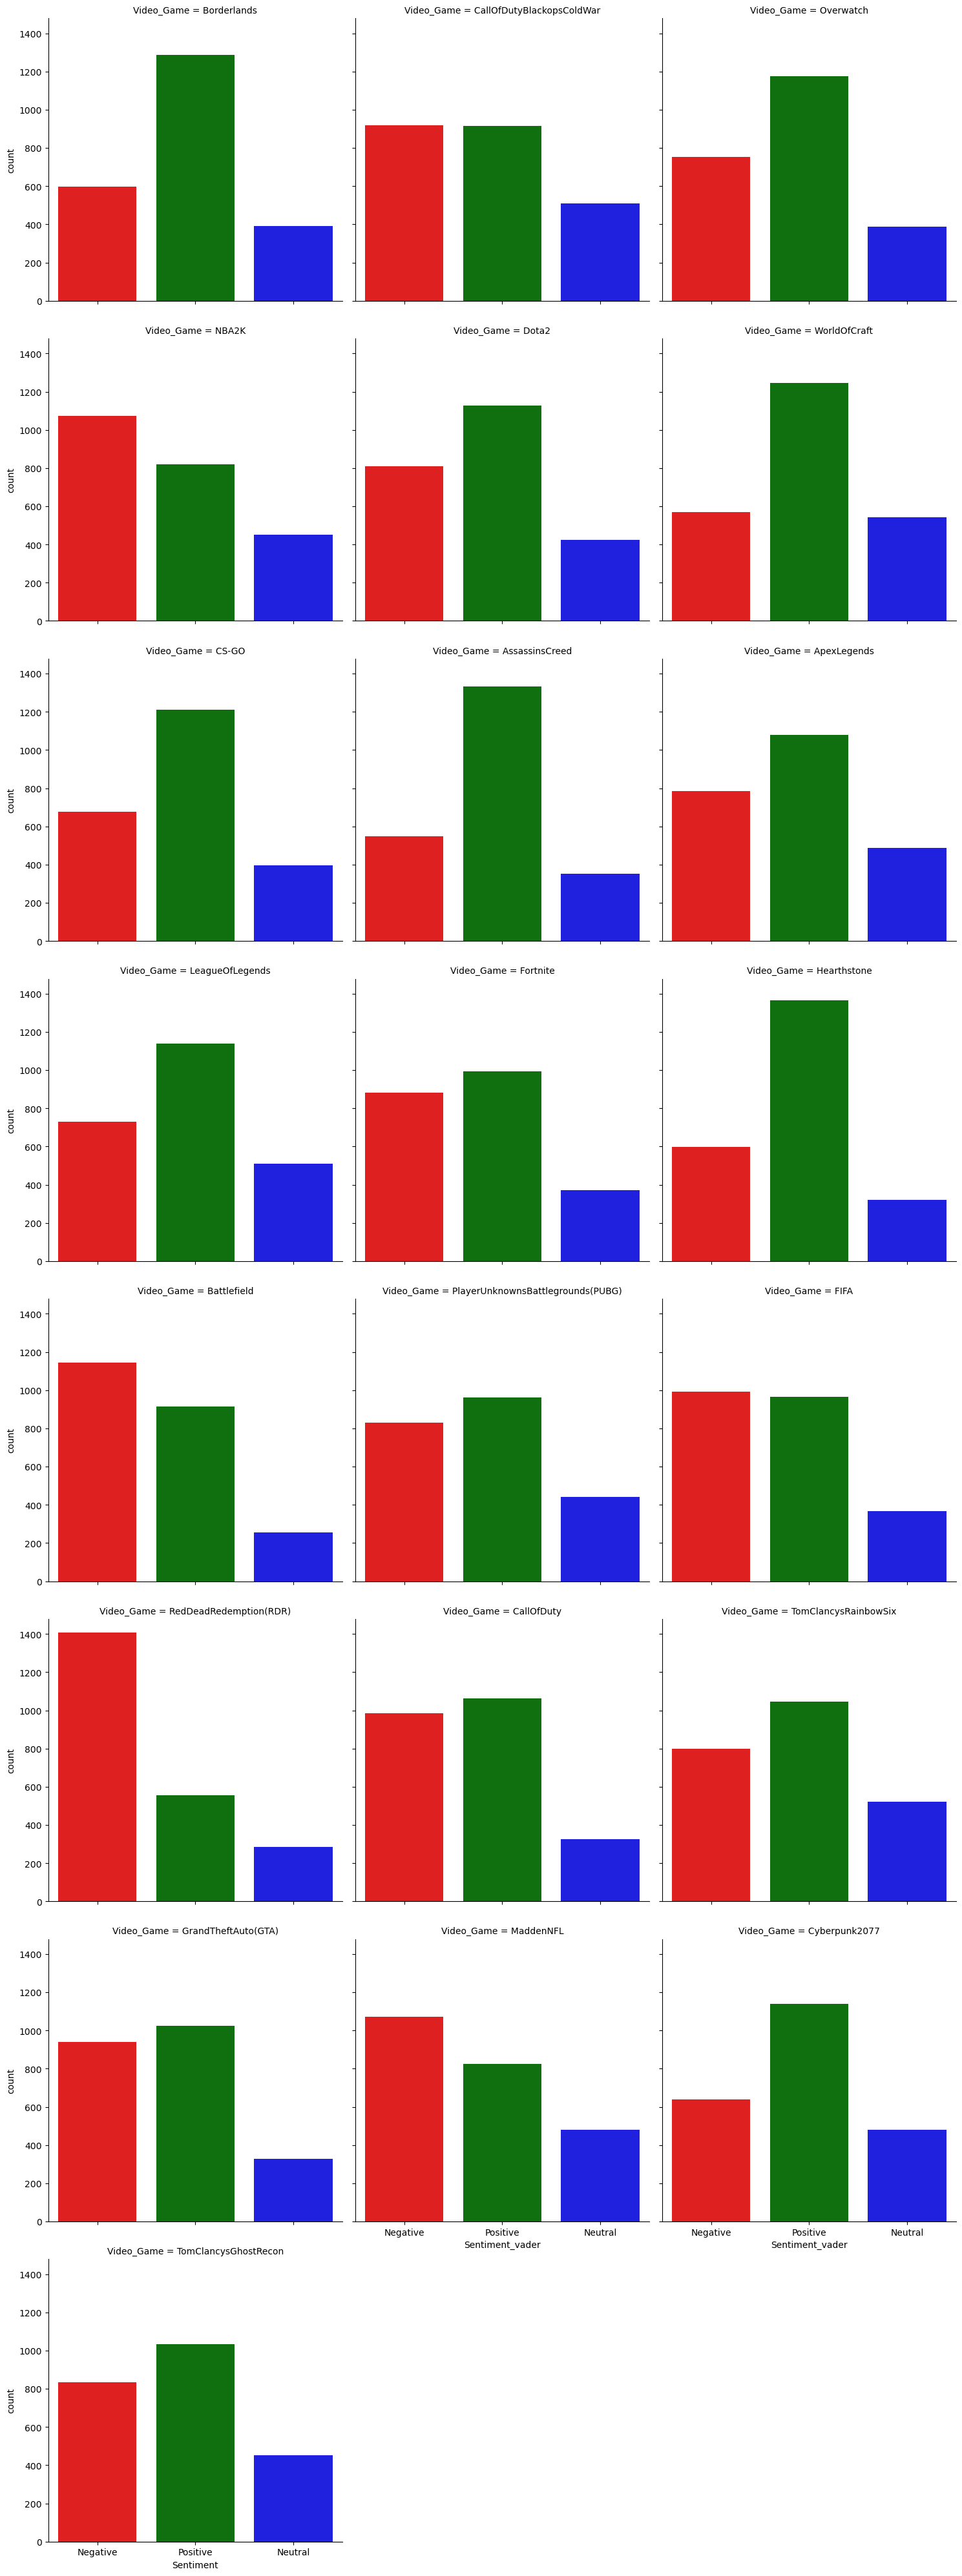

In [32]:
# use function from Seaborn library to create juxtaposable categorical plots illustrating sentiment distribution of individual games. 
sns.catplot(data=sentiment_data, kind= "count", col='Video_Game', x= 'Sentiment_vader', col_wrap=3,palette=sentiment_colors)
plt.xlabel('Sentiment')
plt.show()

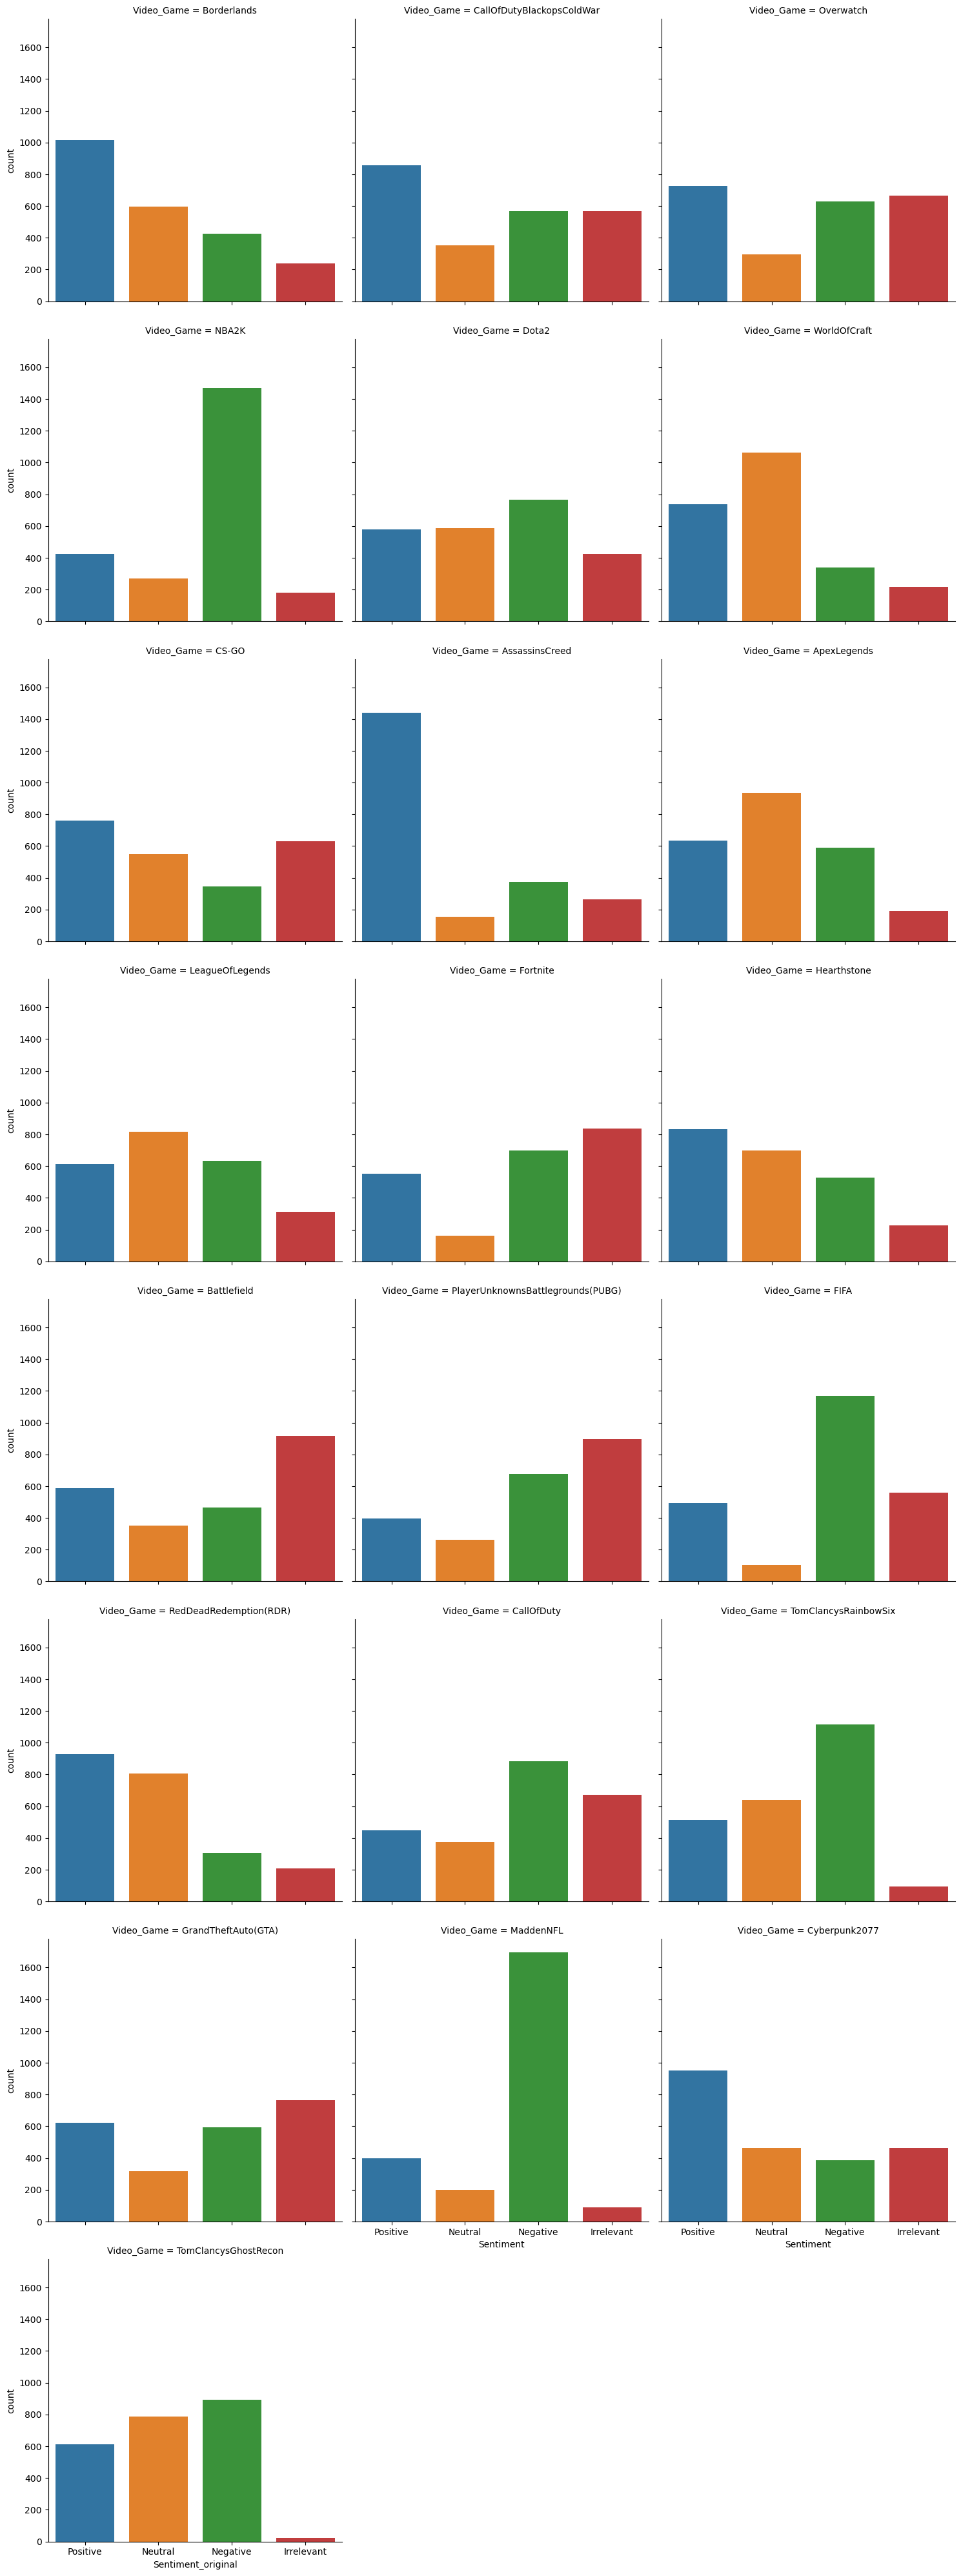

In [90]:
# use function from Seaborn library to create juxtaposable categorical plots illustrating sentiment distribution of individual games with built in sentiment"
sns.catplot(data=sentiment_data, kind= "count", col='Video_Game', x= 'Sentiment', col_wrap=3)
plt.xlabel('Sentiment_original')
plt.show()

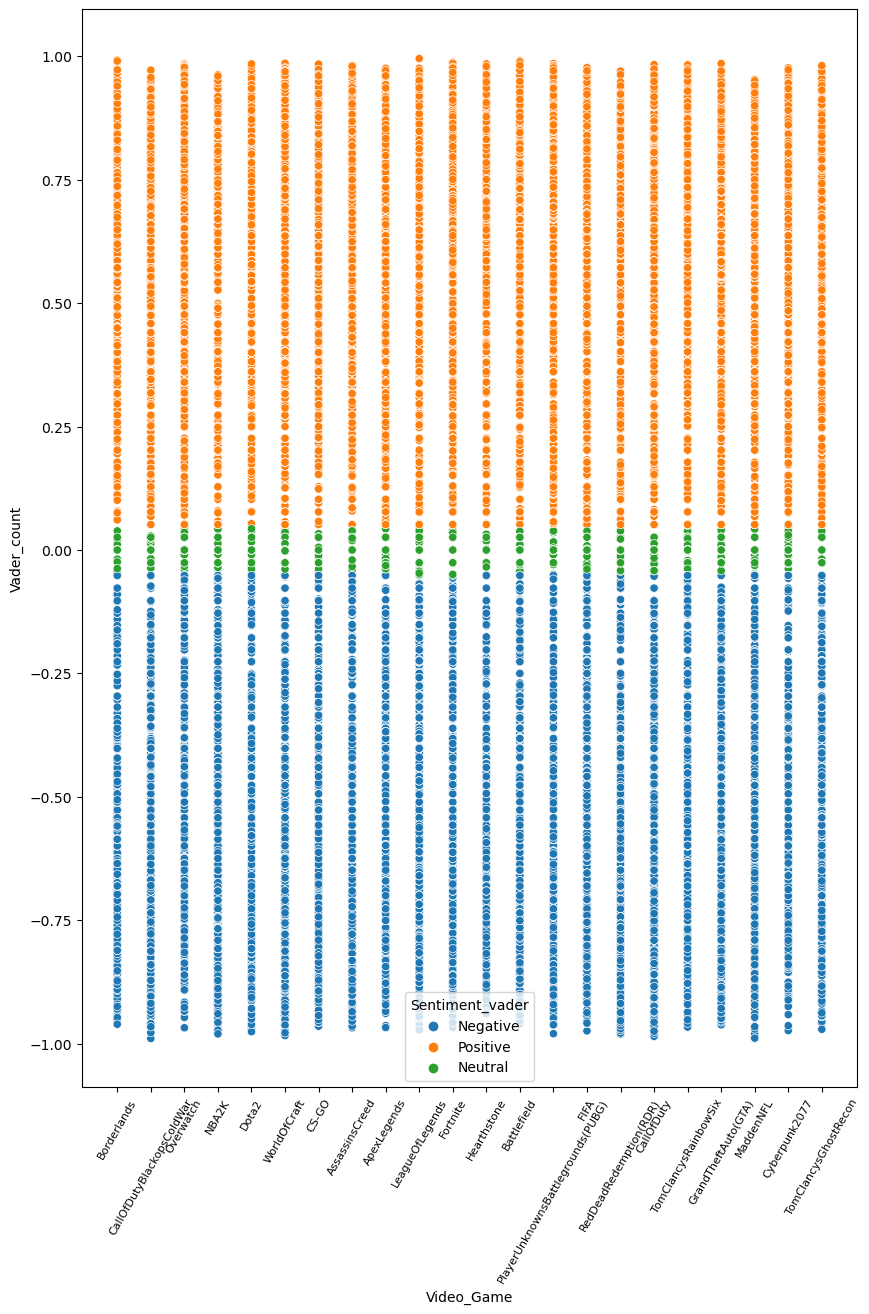

In [41]:
plt.figure(figsize=(10,14))
sns.scatterplot(data=sentiment_data, x="Video_Game", y="Vader_count", hue="Sentiment_vader")
plt.xticks(rotation=60)
plt.xticks(fontsize=8)
plt.show()

# Results/Findings

### Finds the game with the tweet that had the highest vader sentiment score

In [88]:
sentiment_data.sort_values(by ="Vader_count", ascending=False).head(1)

,Video_Game,Sentiment,Clean_Text,Sentiment_vader,Vader_count
32593,LeagueOfLegends,Positive,playing in 03% league tile Clothing is SO enjo...,Positive,0.9957


#### Define function to find which video game has the most positive sentiment analyses

In [65]:
def count_most_occurrences(df, target_column, search_column, search_string):
    # Filter the DataFrame to include only rows where the search column contains the search string
    filtered_sentiment_data = sentiment_data[sentiment_data['Sentiment_vader'].str.contains("Positive", case=False, na=False)]
    
    # Count the occurrences of each value in the target column
    counts = filtered_sentiment_data['Video_Game'].value_counts()
    
    # Get the value with the highest count
    most_common_value = counts.idxmax()
    
    return most_common_value

In [60]:
def count_most_occurrences1(df, target_column, search_column, search_string):
    # Filter the DataFrame to include only rows where the search column contains the search string
    filtered_sentiment_data = sentiment_data[sentiment_data['Sentiment'].str.contains("Positive", case=False, na=False)]
    
    # Count the occurrences of each value in the target column
    counts = filtered_sentiment_data['Video_Game'].value_counts()
    
    # Get the value with the highest count
    most_common_value = counts.idxmax()
    
    return most_common_value

#### Use function to make a new DataFrame that gives the answer to which video game has the most positive analyses

### Most positive game based off of the original sentiment

In [64]:
most_common_positive1 = count_most_occurrences1(sentiment_data, 'Video_Game', 'Sentiment', "Positive")
most_common_positive1

'AssassinsCreed'

### Most positive game based off of Vader

In [74]:
most_common_positive = count_most_occurrences(sentiment_data, 'Video_Game', 'Sentiment_vader', "Positive")
most_common_positive

'Hearthstone'

#### Make a new DataFrame and function that tells us the # of each sentiment analysis that Hearthstone has

In [75]:
AssassinsCreed_filter = sentiment_data[sentiment_data['Video_Game'] == 'Hearthstone']
AssasinsCreedCount = AssassinsCreed_filter['Sentiment_vader'].value_counts()
AssasinsCreedCount

Positive    1366
Negative     598
Neutral      322
Name: Sentiment_vader, dtype: int64

#### Make a new DataFrame and function that tells us the # of each sentiment analysis that Assassincreed has

In [78]:
AssassinsCreed_filter2 = sentiment_data[sentiment_data['Video_Game'] == 'AssassinsCreed']
AssasinsCreedCount2 = AssassinsCreed_filter['Sentiment'].value_counts()
AssasinsCreedCount2

Positive      833
Neutral       698
Negative      527
Irrelevant    228
Name: Sentiment, dtype: int64

### Define a function to find which video game has the most negative sentiment analyses

In [79]:
def count_most_occurrences2(df, target_column, search_column, search_string):
    # Filter the DataFrame to include only rows where the search column contains the search string
    filtered_sentiment_data = sentiment_data[sentiment_data['Sentiment_vader'].str.contains("Negative", case=False, na=False)]
    
    # Count the occurrences of each value in the target column
    counts = filtered_sentiment_data['Video_Game'].value_counts()
    
    # Get the value with the highest count
    most_common_value = counts.idxmax()
    
    return most_common_value

In [80]:
def count_most_occurrences3(df, target_column, search_column, search_string):
    # Filter the DataFrame to include only rows where the search column contains the search string
    filtered_sentiment_data = sentiment_data[sentiment_data['Sentiment'].str.contains("Negative", case=False, na=False)]
    
    # Count the occurrences of each value in the target column
    counts = filtered_sentiment_data['Video_Game'].value_counts()
    
    # Get the value with the highest count
    most_common_value = counts.idxmax()
    
    return most_common_value

#### Use function to make a new DataFrame that gives the answer to which video game has the most negative analyses

### Most negative game based off of Vader

In [81]:
most_common_negative = count_most_occurrences2(sentiment_data, 'Video_Game', 'Sentiment_vader', "Negative")
most_common_negative

'RedDeadRedemption(RDR)'

### Most negative game based off of the original sentiment 

In [82]:
most_common_negative1 = count_most_occurrences3(sentiment_data, 'Video_Game', 'Sentiment', "Negative")
most_common_negative1

'MaddenNFL'

#### Make a new DataFrame that gives us the # of each sentiment analysis that RedDeadRedemption(RDR) has

In [87]:
RDR_filter = sentiment_data[sentiment_data['Video_Game'] == 'RedDeadRedemption(RDR)']
RDRCount = RDR_filter['Sentiment_vader'].value_counts()
RDRCount

Negative    1408
Positive     557
Neutral      284
Name: Sentiment_vader, dtype: int64

#### Make a new DataFrame that gives us the # of each sentiment analysis that MaddenNFL has

In [86]:
RDR_filter2 = sentiment_data[sentiment_data['Video_Game'] == 'MaddenNFL']
RDRCount2 = RDR_filter['Sentiment'].value_counts()
RDRCount2

Positive      927
Neutral       807
Negative      305
Irrelevant    210
Name: Sentiment, dtype: int64

## In Conclusion 

#### AssassinsCreed was the video game that had the most positive player sentiments among relevent Twitter data.

#### RedDeadRedemption was the video game that had the most negative player sentiments among relevent Twitter data.

# Contribution